# 2. Image Manifold Learning

**Project:** Image EDA (Olivetti Faces)
**Goal:** Visualize the high-dimensional "Face Space" in 2D to see if different people cluster together.

---

## 1. Imports and Data Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os

sns.set_style('whitegrid')

# Load data
data_home = '../../data/raw/scikit_learn_data'
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42, data_home=data_home)
X = olivetti.data
y = olivetti.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to ../../data/raw/scikit_learn_data


## 2. Dimensionality Reduction Pipeline
Images are $64 \times 64 = 4096$ dimensions. We use PCA to reduce to 50, then t-SNE.

In [2]:
print("1. Running PCA...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

print("2. Running t-SNE...")
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_pca)

print("Shape after t-SNE:", X_tsne.shape)

1. Running PCA...
2. Running t-SNE...


Shape after t-SNE: (400, 2)


## 3. Visualization
There are 40 people. Let's color by person.

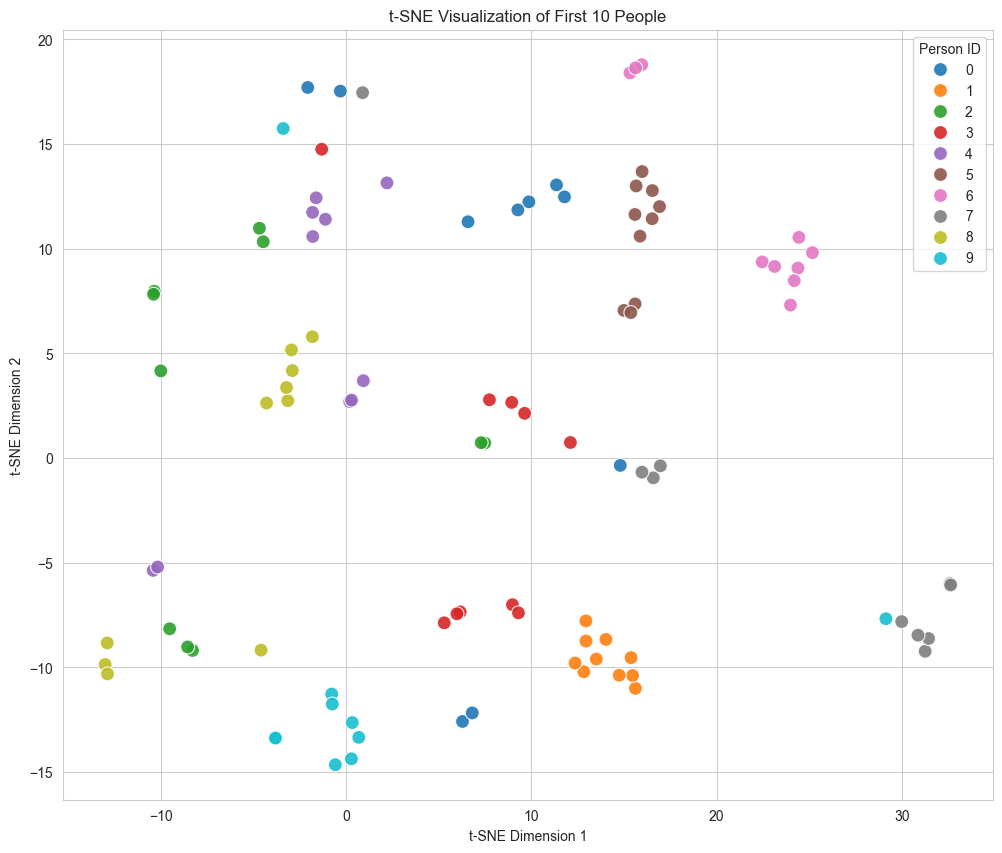

In [3]:
# To avoid a messy plot with 40 colors, let's plot just the first 10 people
mask = y < 10
X_plot = X_tsne[mask]
y_plot = y[mask]

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=X_plot[:,0], 
    y=X_plot[:,1], 
    hue=y_plot, 
    palette='tab10', 
    s=100, 
    alpha=0.9,
    legend='full'
)
plt.title('t-SNE Visualization of First 10 People')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Person ID')
plt.show()